In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def image_to_matrix(image_path):
    img = Image.open(image_path)
    img_gray = img.convert('L')
    img_array = np.array(img_gray)
    return img_array

In [3]:
def CalculateS(matrix):
    newMatrix = []
    for row in matrix:
        sumSoFar = np.int64(0)
        newArray = []
        for i in range(len(row)):
            sumSoFar += np.int64(row[i])
            newArray.append(sumSoFar)
        newMatrix.append(newArray)
    return np.array(newMatrix, dtype=np.int64)

def CalculateII(matrix):
    newMatrix = []
    newMatrix.append(matrix[0])
    for j in range(1, len(matrix)):
        newArray = []
        for i in range(len(matrix[j])):
            ii = np.int64(newMatrix[j-1][i]) + np.int64(matrix[j][i])
            newArray.append(ii)
        newMatrix.append(newArray)
    return np.array(newMatrix, dtype=np.int64)

def CalculateIntegral(matrix):
    matrix = np.array(matrix, dtype=np.int64)
    sMatrix = CalculateS(matrix)
    return CalculateII(sMatrix)

In [8]:
mat=[[1,2,3],[4,5,6],[7,8,9]]
intImg=CalculateIntegral(mat)
print("intImg: ", intImg)
imagePath = "/kaggle/input/cvimages/Image 1.jpeg"
matrix = image_to_matrix(imagePath)
integralImage = CalculateIntegral(matrix)
print("integralImage", integralImage)

intImg:  [[ 1  3  6]
 [ 5 12 21]
 [12 27 45]]
integralImage [[      228       457       686 ...    173370    173608    173846]
 [      457       915      1373 ...    346677    347153    347629]
 [      686      1373      2060 ...    520321    521034    521747]
 ...
 [   171075    342174    513281 ... 124385942 124563218 124740496]
 [   171298    342619    513948 ... 124472130 124649643 124827158]
 [   171519    343061    514612 ... 124557444 124735193 124912944]]


In [9]:
def CalculateLocalSum(matrix, p0, p1):
    x0, y0 = p0
    x1, y1 = p1
    sumSoFar = matrix[x1][y1]
    if x0 != 0 and y0 != 0:
        sumSoFar += matrix[x0-1][y0-1] - matrix[x0-1][y1] - matrix[x1][y0-1] 
    elif x0 == 0 and y0 != 0: 
        sumSoFar -= matrix[x1][y0-1] 
    elif y0 == 0 and x0 != 0:
        sumSoFar -= matrix[x0-1][y1] 
    return sumSoFar

In [12]:
locSum=CalculateLocalSum(mat, (0,0), (2,2))
print("locSum: ", locSum)
localSum = CalculateLocalSum(matrix, (0,0), (2,2))
print("localSum: ", localSum)

locSum:  9
localSum:  229


In [13]:
def DetectEye(matrix, n):
    width = n
    height = int(0.15 * n) 
    maxScore = -float('inf') 
    maxPoint = (0, 0)
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            P1 = (i + int(-0.5*height), j + int(-0.5*width))
            P2 = (i + 0, j + int(-0.05*width))
            P3 = (i + 0, j + int(-0.5*width))
            P4 = (i + int(0.5*height), j + int(-0.05*width))
            P5 = (i + int(-0.5*height), j + int(0.05*width))
            P6 = (i + 0, j + int(0.5*width))
            P7 = (i + 0, j + int(0.05*width))
            P8 = (i + int(0.5*height), j + int(0.5*width))
            P9 = (i + int(0.833*height), j + int(-0.325*width))
            P10 = (i + int(2*height), j + int(-0.225*width))
            P11 = (i + int(0.833*height), j + int(-0.1*width))
            P12 = (i + int(2*height), j + int(0.1*width))
            P13 = (i + int(0.833*height), j + int(0.225*width))
            P14 = (i + int(2*height), j + int(0.325*width))
            allPoints = [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14]
            valid = True
            for point in allPoints:
                px, py = point
                if px < 0 or py < 0 or px >= len(matrix) or py >= len(matrix[0]):
                    valid = False
                    break
            if not valid:
                continue 
            LS1 = CalculateLocalSum(matrix, P1, P2)
            LS2 = CalculateLocalSum(matrix, P3, P4)
            LS3 = CalculateLocalSum(matrix, P5, P6)
            LS4 = CalculateLocalSum(matrix, P7, P8)
            LS5 = CalculateLocalSum(matrix, P9, P10)
            LS6 = CalculateLocalSum(matrix, P11, P12)
            LS7 = CalculateLocalSum(matrix, P13, P14)
            score = LS1 - LS2 + LS3 - LS4 - LS5 + LS6 - LS7       
            if score > maxScore:
                maxScore = score
                maxPoint = (i, j)
    return maxPoint

In [14]:
detectedPoint = DetectEye(integralImage, 330)
print("Eye detected at:", detectedPoint)

Eye detected at: (219, 567)


In [15]:
def ExtractDetectedEye(image, maxPoint, n):
    matrix = image_to_matrix(image)
    width = n
    height = int(0.15 * n)
    i, j = maxPoint
    result_image = np.zeros_like(matrix)
    top = i + int(-0.5 * height)
    bottom = i + int(2 * height)  
    left = j + int(-0.5 * width)
    right = j + int(0.5 * width)
    top = max(0, top)
    bottom = min(len(matrix), bottom)
    left = max(0, left)
    right = min(len(matrix[0]), right)
    result_image[top:bottom, left:right] = matrix[top:bottom, left:right]
    return result_image

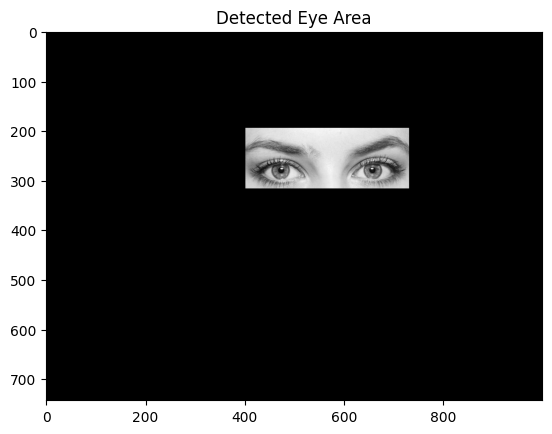

In [18]:
eyeArea = ExtractDetectedEye(imagePath, detectedPoint, 330)
plt.imshow(eyeArea, cmap='gray')
plt.title("Detected Eye Area")
plt.show()

Eye detected at: (241, 523)


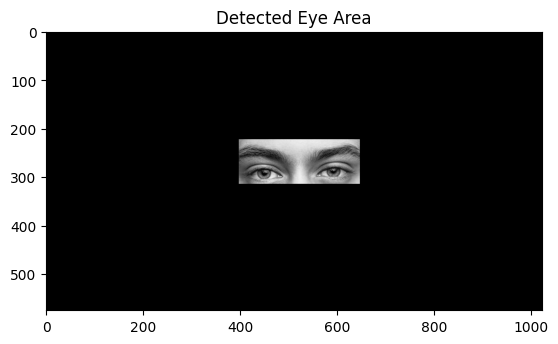

In [19]:
imagePath2 = "/kaggle/input/cvimages/Image 2.jpeg"
matrix2 = image_to_matrix(imagePath2)
integralImage2 = CalculateIntegral(matrix2)
detectedPoint2 = DetectEye(integralImage2, 250)
print("Eye detected at:", detectedPoint2)
eyeArea2 = ExtractDetectedEye(imagePath2, detectedPoint2, 250)
plt.imshow(eyeArea2, cmap='gray')
plt.title("Detected Eye Area")
plt.show()

Eye detected at: (89, 201)


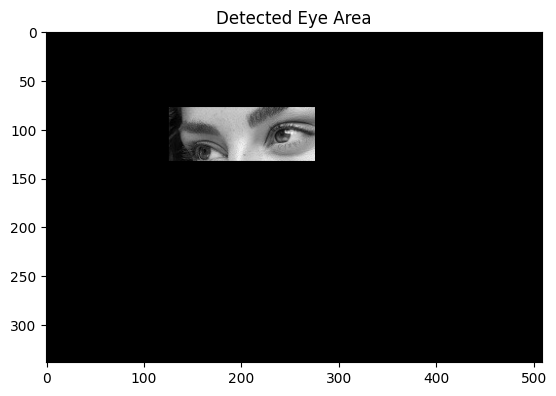

In [20]:
imagePath3 = "/kaggle/input/cvimages/Image 3.jpeg"
matrix3 = image_to_matrix(imagePath3)
integralImage3 = CalculateIntegral(matrix3)
detectedPoint3 = DetectEye(integralImage3, 150)
print("Eye detected at:", detectedPoint3)
eyeArea3 = ExtractDetectedEye(imagePath3, detectedPoint3, 150)
plt.imshow(eyeArea3, cmap='gray')
plt.title("Detected Eye Area")
plt.show()